In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,recall_score
from sklearn.model_selection import cross_val_score,train_test_split
import itertools
%matplotlib inline

In [2]:
c_data = pd.read_csv('creditcard.csv')
# c_data.info()

0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Frequency')

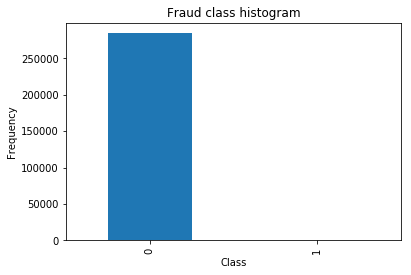

In [3]:
# count the classes
target = c_data['Class'].value_counts(sort= True).sort_index()
print(target)
# sns.stripplot(x = 'Class',y = 'Amount',data = c_data.iloc[:100,:],jitter = True)
# print(target)
target.index.name = 'index'
target.columns = 'class'
target.plot(kind = 'bar')
# sns.barplot(x = 'index', y = 'Class', data = target)
# sns.barplot(x = 'index', y = 'Class', data = target)
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [4]:
# standarlized the amount
scale = StandardScaler()
data = c_data.copy()
data['normAmount'] = scale.fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Time','Amount'],axis = 1, inplace = True)
# data.head()

In [5]:
x_data = data.loc[:, data.columns!='Class']
y_data = data.loc[:, data.columns=='Class']

### Under sampling ###

In [6]:
rdm = RandomUnderSampler()
under_data_x, under_data_y = rdm.fit_sample(x_data,y_data)

In [7]:
# Different C parameters
c_param_range = [0.01,0.1,1,10,100]

results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
results_table['C_parameter'] = c_param_range

scores = []
for c_param in c_param_range:
    print('-------------------------------------------')
    print('C parameter: ', c_param)
    print('-------------------------------------------')
    print('')

    lr = LogisticRegression(C=c_param, penalty='l1')
    score = np.round(cross_val_score(lr, under_data_x, under_data_y.ravel(), cv=5, scoring = 'recall').mean(),3)
    scores.append(score)
results_table['Mean recall score'] = scores

best_c = results_table.loc[results_table['Mean recall score'].idxmax(), 'C_parameter']


print('*********************************************************************************')
print('Best model to choose from cross validation is with C parameter = ', best_c)
print('*********************************************************************************')

-------------------------------------------
C parameter:  0.01
-------------------------------------------

-------------------------------------------
C parameter:  0.1
-------------------------------------------

-------------------------------------------
C parameter:  1
-------------------------------------------

-------------------------------------------
C parameter:  10
-------------------------------------------

-------------------------------------------
C parameter:  100
-------------------------------------------



d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


*********************************************************************************
Best model to choose from cross validation is with C parameter =  0.01
*********************************************************************************


d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
# define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    Instructions: This function prints and plots the confusion matrix.
    
    Parameters:
        cm: the confusion matrix, get from confusion_matrix() function
        classes: the label
        cmap: the color map
   
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


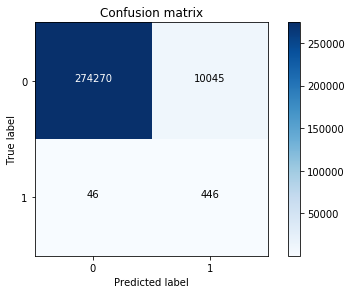

In [9]:
# Using the best c to predict original data
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(under_data_x,under_data_y)
predicitions = lr.predict(x_data.values)
cm = confusion_matrix(y_data.values.ravel(),predicitions)
plot_confusion_matrix(cm,classes=[0,1])

d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


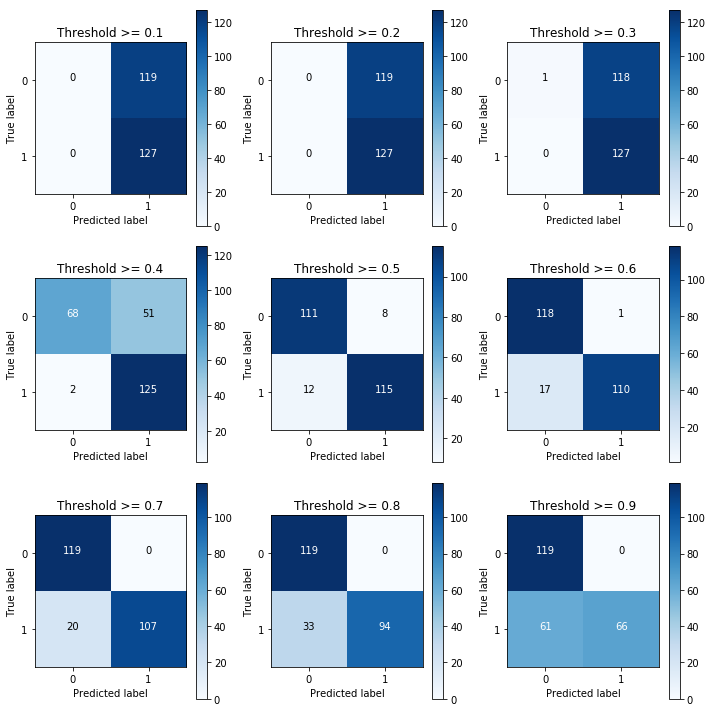

In [10]:
# Different thresholds to analysis the recall rate
under_x_train, under_x_test, under_y_train, under_y_test = train_test_split(under_data_x, under_data_y,random_state = 0)
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(under_x_train,under_y_train)
predicitions = lr.predict_proba(under_x_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))
j = 1
for i in thresholds:
    predicitions_j = predicitions[:,1] > i
    
    cm = confusion_matrix(under_y_test, predicitions_j)
    
    plt.subplot(3,3,j)
    np.set_printoptions(precision=2)
    
    plot_confusion_matrix(cm, classes=[0,1],title='Threshold >= %s'%i)
    j += 1

### Over_smapling ###

In [11]:
data = pd.read_csv('creditcard.csv')
data['normAmount'] = scale.fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Time','Amount'],axis = 1, inplace = True)

In [12]:
from imblearn.over_sampling import SMOTE
data_x = data.loc[:, data.columns != 'Class'].values
data_y = data.loc[:, data.columns == 'Class'].values

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y,random_state=0)
smote = SMOTE(random_state=0)
over_x, over_y = smote.fit_sample(train_x, train_y)
print(over_x.shape, over_y.shape)

d:\language\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(426466, 29) (426466,)


In [13]:
# Different C parameters
c_param_range = [0.01,0.1,1,10,100]

results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
results_table['C_parameter'] = c_param_range

scores = []
for c_param in c_param_range:
    print('-------------------------------------------')
    print('C parameter: ', c_param)
    print('-------------------------------------------')
    print('')

    lr = LogisticRegression(C=c_param, penalty='l1')
    score = np.round(cross_val_score(lr, over_x, over_y.ravel(), cv=5, scoring = 'recall').mean(),3)
    scores.append(score)
    
results_table['Mean recall score'] = scores

best_c = results_table.loc[results_table['Mean recall score'].idxmax(), 'C_parameter']


print('*********************************************************************************')
print('Best model to choose from cross validation is with C parameter = ', best_c)
print('*********************************************************************************')

-------------------------------------------
C parameter:  0.01
-------------------------------------------



d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-------------------------------------------
C parameter:  0.1
-------------------------------------------



d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-------------------------------------------
C parameter:  1
-------------------------------------------



d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-------------------------------------------
C parameter:  10
-------------------------------------------



d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-------------------------------------------
C parameter:  100
-------------------------------------------



d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


*********************************************************************************
Best model to choose from cross validation is with C parameter =  0.1
*********************************************************************************


d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.9166666666666666


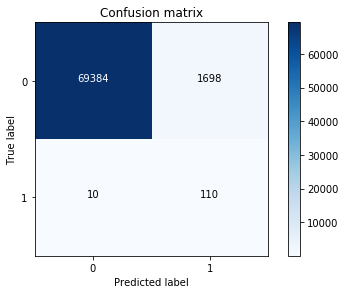

In [97]:
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(over_x, over_y)
predctions = lr.predict(test_x)

cm_over = confusion_matrix(test_y, predctions)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cm_over[1,1]/(cm_over[1,0]+cm_over[1,1]))
plot_confusion_matrix(cm_over, classes=[0,1])